In [9]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image

In [20]:
import os
print("Current working directory:", os.getcwd())  # Shows where your script is running
os.chdir("C:/Users/trisu/OneDrive/Dokumen/dataset penyakit")  # Change to the correct directory


Current working directory: c:\Users\trisu\OneDrive\Dokumen\dataset_penyakit


In [15]:
import os
file_path = r'C:/Users/trisu/OneDrive/Dokumen/dataset penyakit/model_penyakit.h5'
if os.path.exists(file_path):
    print("File found!")
else:
    print("File not found!")


File not found!


In [14]:

# Tentukan ukuran gambar dan batch size
IMG_SIZE = 128  # Ukuran gambar sesuai dengan model Anda
BATCH_SIZE = 32

# Direktori untuk data uji
test_dir = r'C:\Users\trisu\OneDrive\Dokumen\dataset penyakit\Test\Test'  # Ganti dengan path ke direktori dataset uji

# Membuat ImageDataGenerator untuk data uji
test_datagen = ImageDataGenerator(rescale=1./255)  # Normalisasi gambar

# Membuat generator untuk data uji
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_SIZE, IMG_SIZE),  # Ubah ukuran gambar agar sesuai dengan input model
    batch_size=BATCH_SIZE,
    class_mode='categorical',  # Gunakan 'categorical' untuk multi-kelas
    shuffle=False  # Jangan acak data saat evaluasi
)

# Menampilkan beberapa informasi
print("Total gambar dalam dataset uji:", test_generator.samples)
print("Jumlah kelas:", len(test_generator.class_indices))
print("Nama kelas:", test_generator.class_indices)


Found 150 images belonging to 3 classes.
Total gambar dalam dataset uji: 150
Jumlah kelas: 3
Nama kelas: {'Healthy': 0, 'Powdery': 1, 'Rust': 2}


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


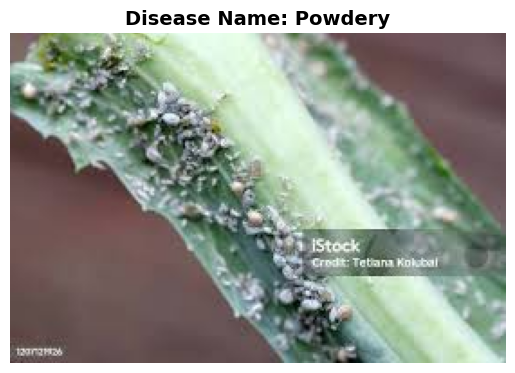

In [ ]:


# Ganti dengan lokasi file model dan gambar Anda
model_path = r'c:\Users\trisu\OneDrive\Dokumen\dataset penyakit\model_penyakit.h5'  # Ganti dengan path model Anda
image_path = 'download.jpg' # Ganti dengan path gambar yang akan diprediksi

# Memuat model yang telah dilatih
model = tf.keras.models.load_model(model_path)

# Memuat gambar
img = mpimg.imread(image_path)

# Tampilkan gambar
plt.imshow(img)
plt.axis('off')  # Menyembunyikan axis

# Memuat gambar dengan target_size yang sesuai dengan model (misalnya 224x224)
IMG_SIZE = 128  # Sesuaikan dengan ukuran input model Anda
img = image.load_img(image_path, target_size=(IMG_SIZE, IMG_SIZE))

# Mengubah gambar menjadi array dan normalisasi
img_array = image.img_to_array(img) / 255.0  # Normalisasi jika model dilatih dengan normalisasi

# Menambah dimensi batch
img_array = np.expand_dims(img_array, axis=0)

# Prediksi kelas gambar
predictions = model.predict(img_array)

# Mengambil kelas yang diprediksi
predicted_class = np.argmax(predictions, axis=1)

# Daftar kelas (nama-nama penyakit) yang digunakan oleh model
# Pastikan class_names sesuai dengan urutan kelas dalam model Anda
class_names = ['Healthy', 'Powdery', 'Rust']

# Menampilkan nama penyakit yang diprediksi
predicted_label = class_names[predicted_class[0]]

# Menambahkan teks pada gambar
plt.title(f'Disease Name: {predicted_label}', fontsize=14, fontweight='bold', color='black')
plt.show()
